In [26]:
from __future__ import print_function
from IPython.display import clear_output
import sdm as sdmlib
from sdm import utils
from scipy.stats import binom
%matplotlib inline

* d = distance to the target
* h = number of activated hardlocations
* s = total stored bitstrings
* H = number of hardlocations
* w = number of times the target bitstring has been written

In [2]:
_phi_fn_cache = {}

In [10]:
def phi_fn(n, H, r, d, steps=500):
    key = (n, H, r, d, steps)
    if key in _phi_fn_cache:
        return _phi_fn_cache[key]
    v = []
    for _ in range(steps):
        bs1 = sdmlib.Bitstring.init_random(n)
        bs2 = bs1.copy()
        bs2.flip_random_bits(d)
        selected1 = address_space.scan_thread2(bs1, r)
        selected2 = address_space.scan_thread2(bs2, r)
        x = len(set(selected1) & set(selected2))
        v.append(x)
    mu = 1.0*sum(v)/len(v)
    _phi_fn_cache[key] = mu
    return mu

In [4]:
def prob_wrong_bit0(h, H, s, w, d, phi, theta):
    x = 1.0*s*h*h/(2*H)
    return 1 - binom.cdf(x, theta, 0.5)

In [5]:
def prob_wrong_bit1(h, H, s, w, d, phi, theta):
    x = s*h*h/(2*H)-w*phi
    return binom.cdf(x, theta, 0.5)

In [14]:
def prob_wrong(n, h, H, s, w, d, phi_steps=500):
    phi = phi_fn(n, H, r, d, steps=phi_steps)
    theta = 1.0*s*h*h/H - w*phi
    p0 = prob_wrong_bit0(h, H, s, w, d, phi, theta)
    p1 = prob_wrong_bit1(h, H, s, w, d, phi, theta)
    return (p0+p1)/2.0

In [77]:
n = 1000
r = 451
H = 1000000
s = 10000
w = 1
phi_steps=5

In [12]:
p = utils.calculate_probability(n, r)
h = p*H
address_space = sdmlib.AddressSpace.init_random(n, H)

In [78]:
distances = list(range(0, n+1))
y_values = []
err_values = []
for d in distances:
    clear_output(wait=True)
    print('Calculating for d={}... '.format(d), end='')
    y = prob_wrong(n=n, h=h, H=H, s=s, w=w, d=d, phi_steps=phi_steps)
    err = abs(y - 1.0*d/n)
    print(y, err)
    y_values.append(y)
    err_values.append(err)

Calculating for d=1000... 0.5 0.5


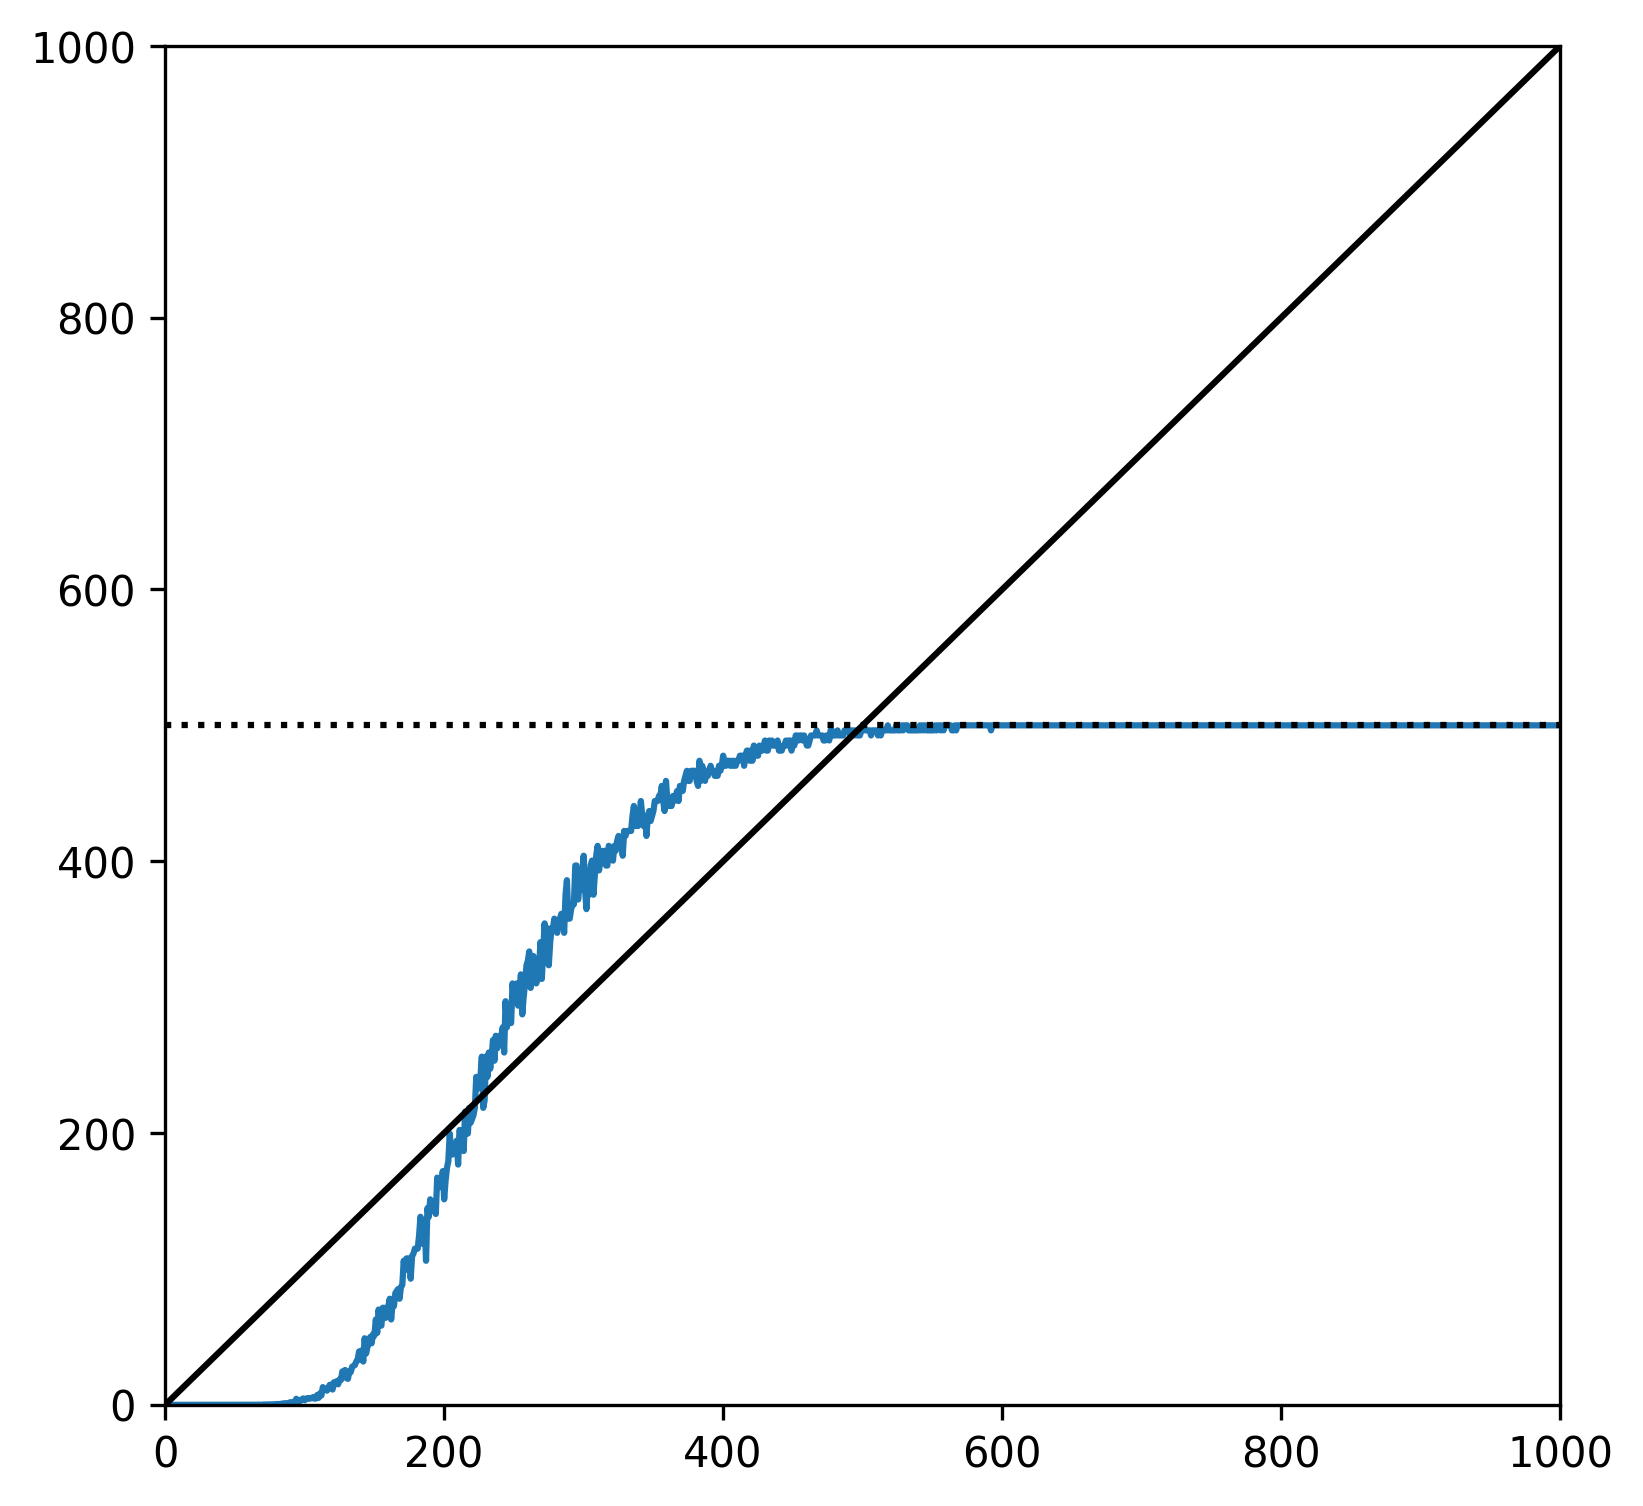

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6), dpi=300)
plt.plot(distances, [n*y for y in y_values])
plt.plot(distances, distances, 'k')
plt.plot(distances, [n//2 for _ in distances], 'k:')
plt.xlim(0, n)
plt.ylim(0, n)
plt.show()

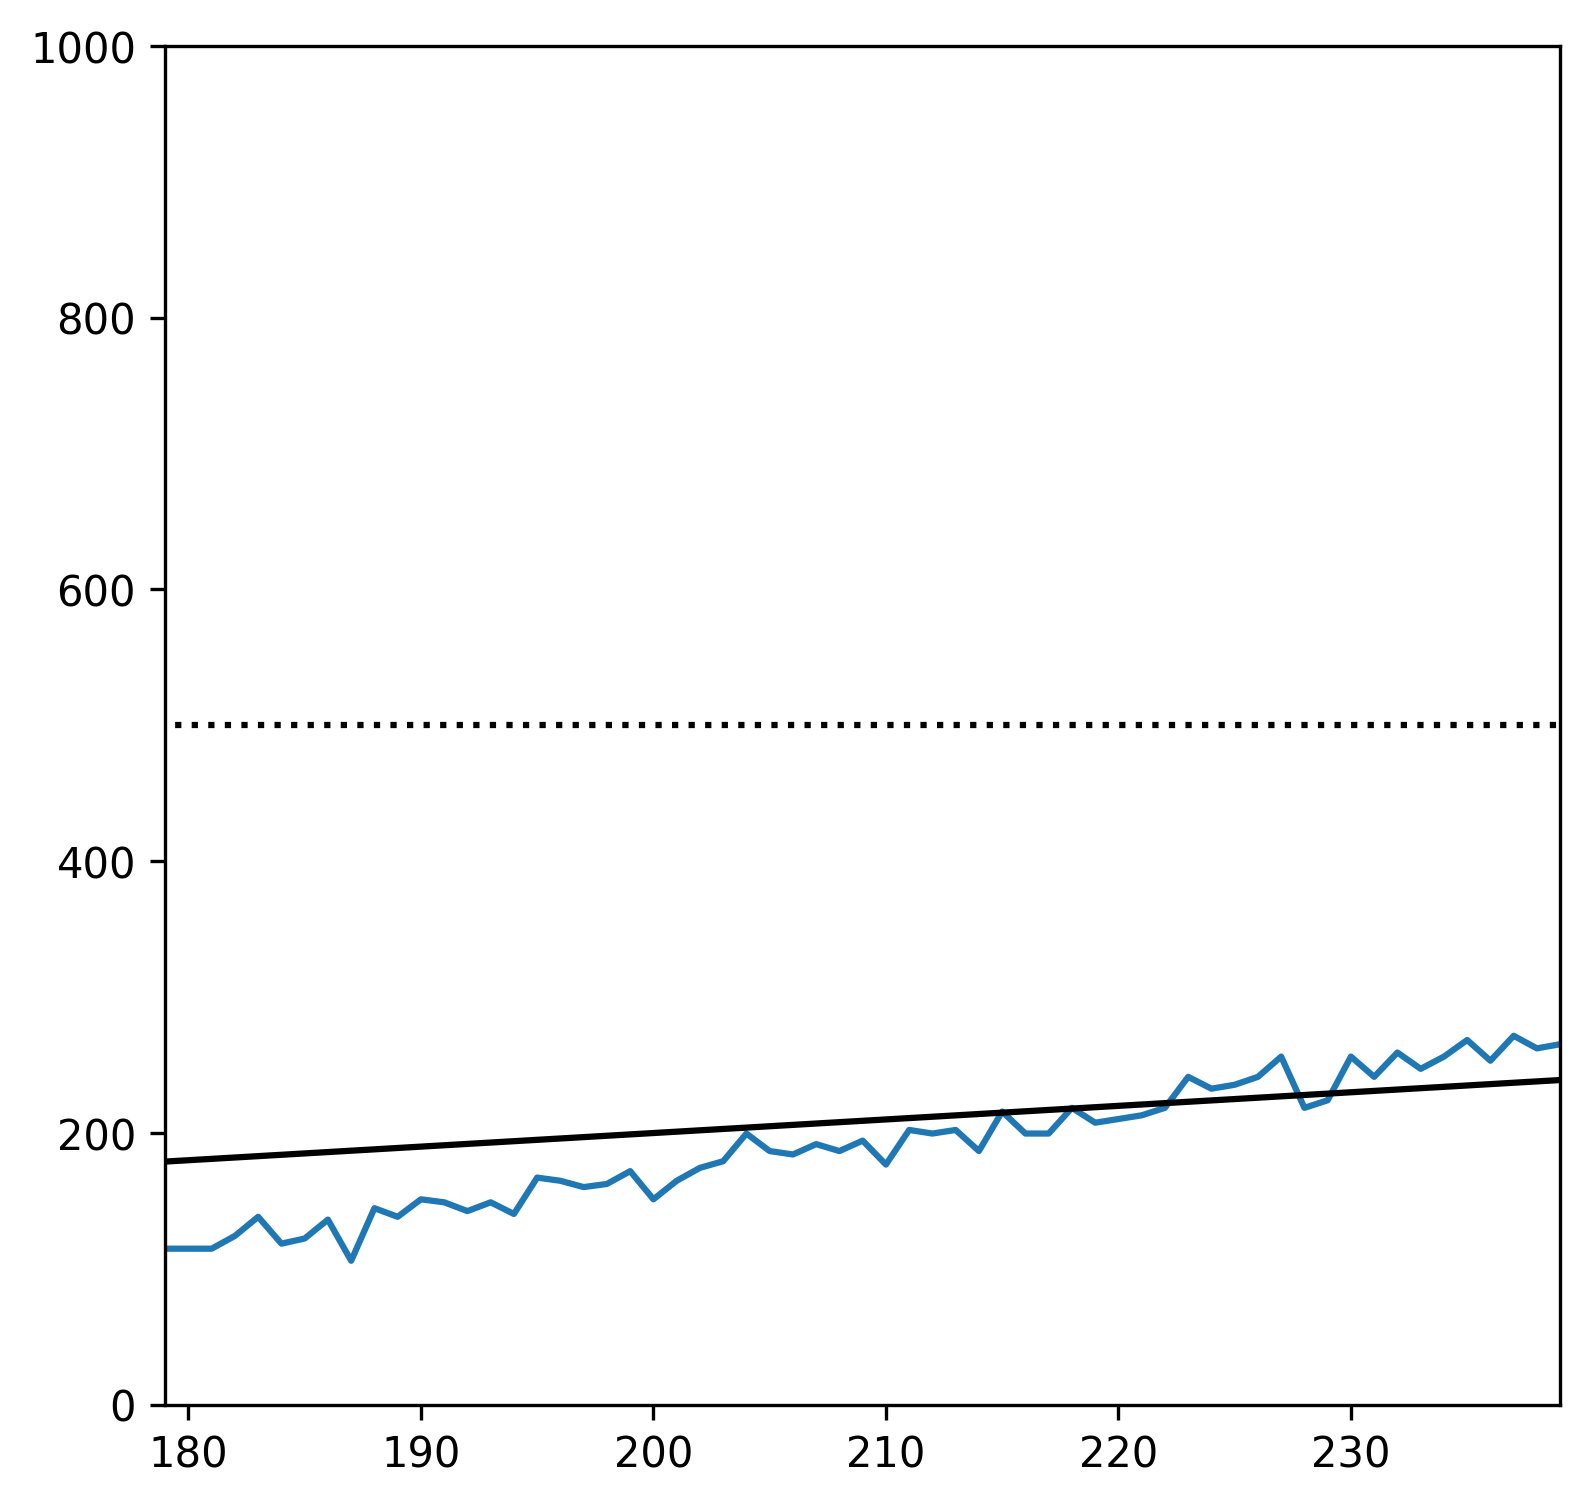

In [91]:
mid = 209
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6), dpi=300)
plt.plot(distances, [n*y for y in y_values])
plt.plot(distances, distances, 'k')
plt.plot(distances, [n//2 for _ in distances], 'k:')
plt.xlim(mid-30, mid+30)
plt.ylim(0, n)
plt.show()

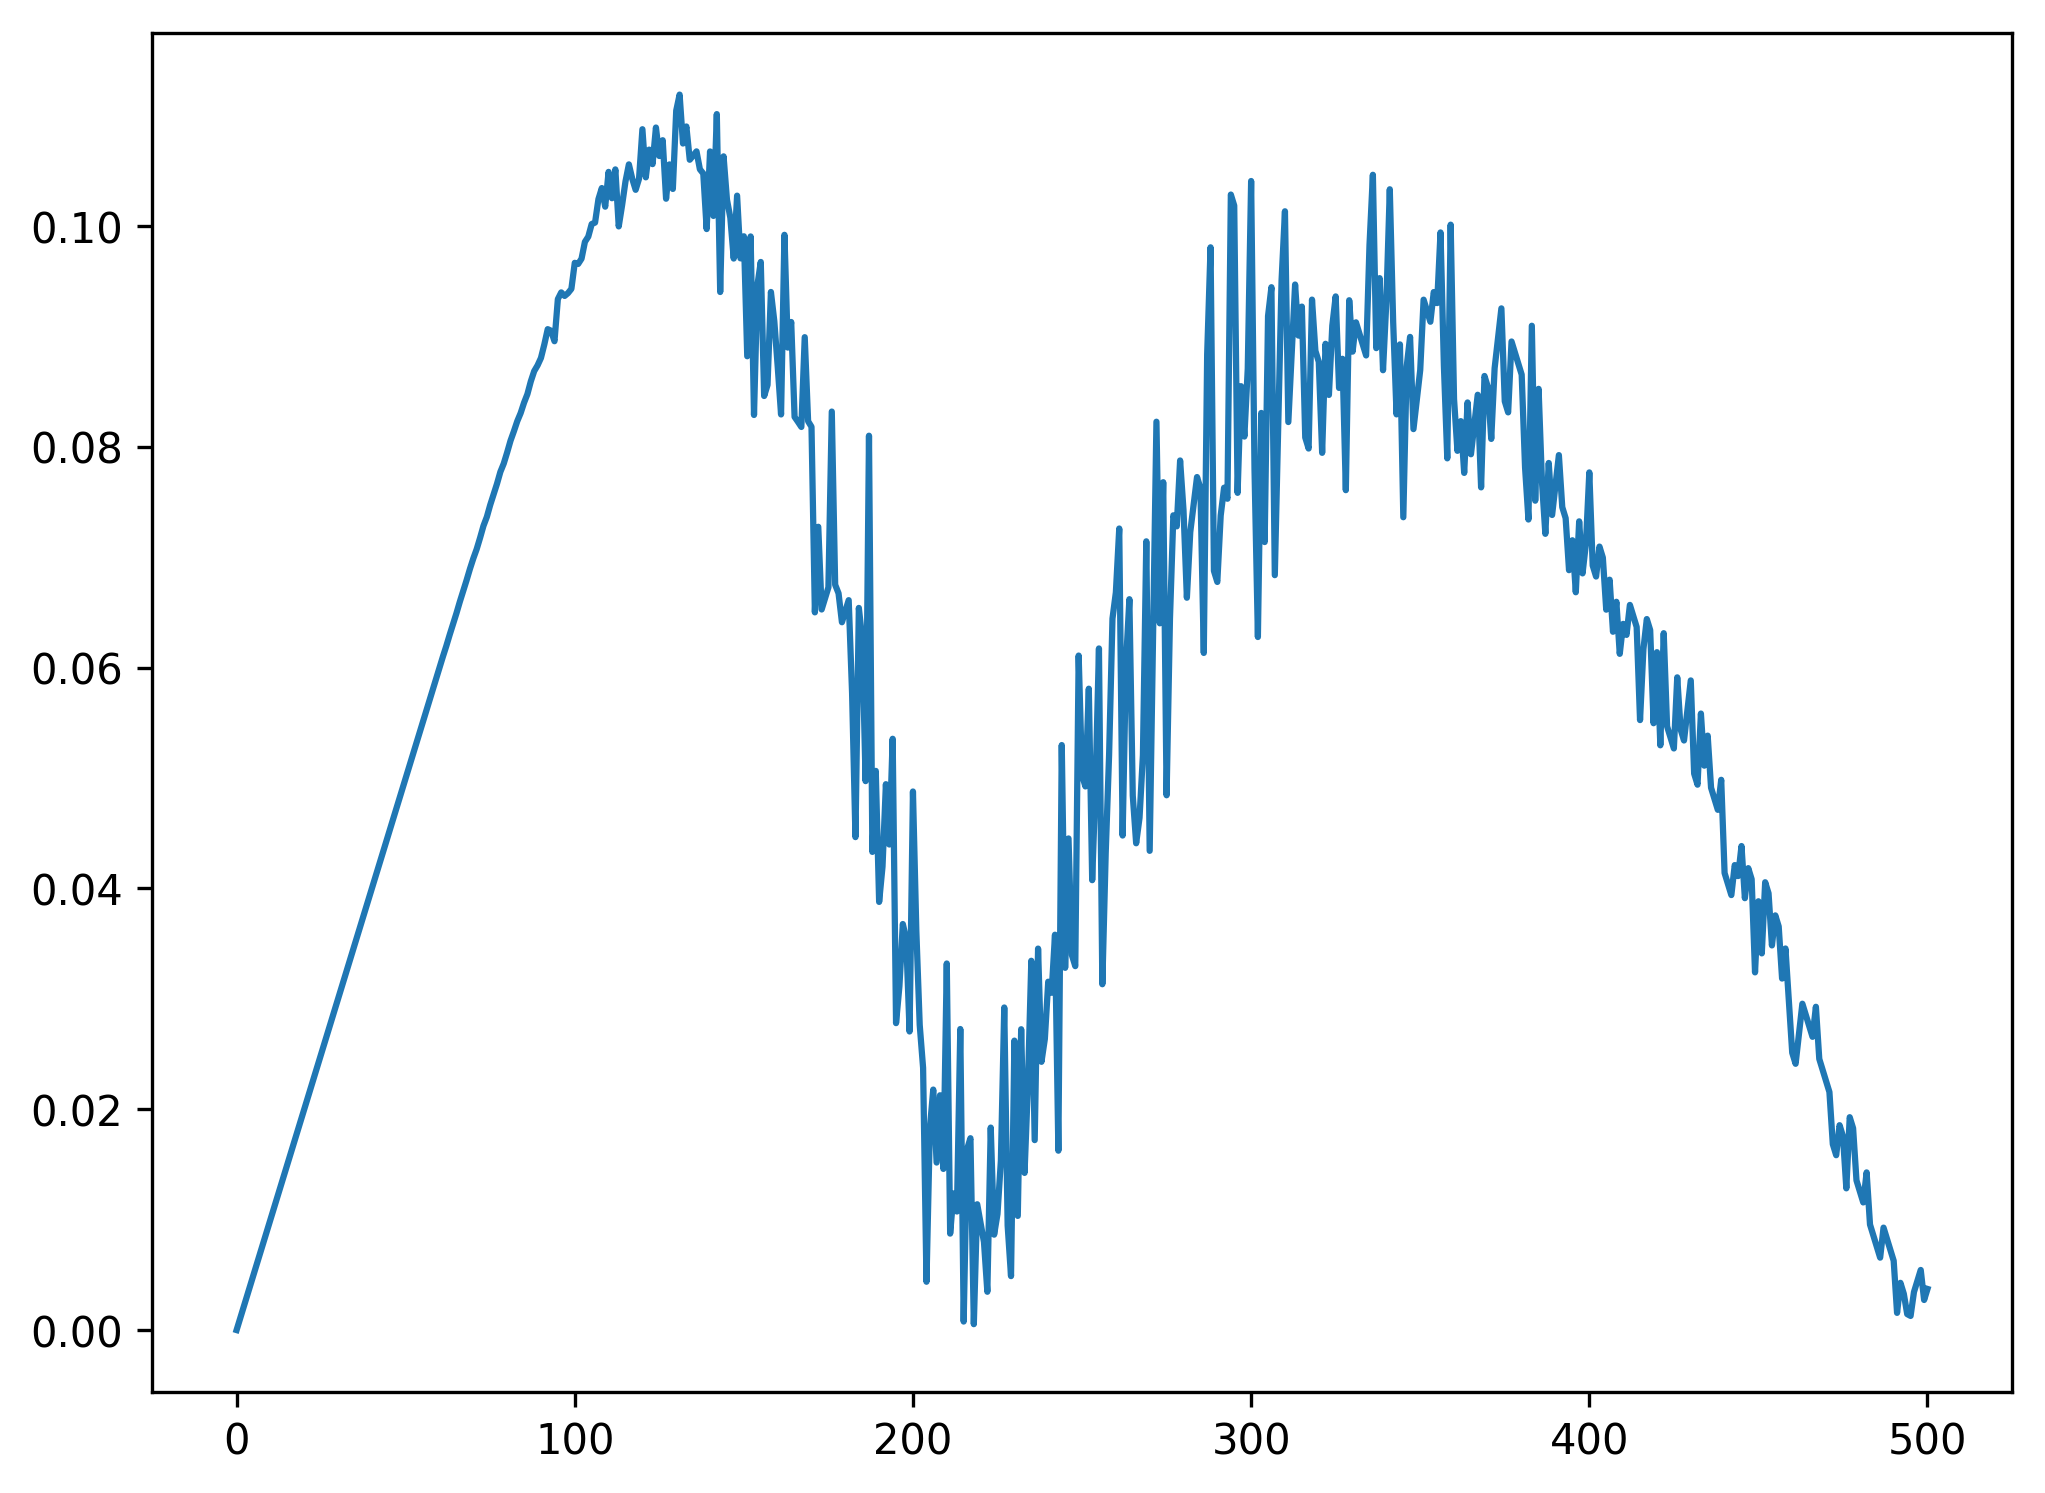

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(distances[:n//2+1], err_values[:n//2+1])
plt.show()